In [2]:
# importing packages
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

train_path = r"dataset\dataset\train"
train_list = glob.glob(train_path + "/*.csv")
train_df = pd.DataFrame(pd.read_csv(train_list[0]))
for i in range(1,len(train_list)):
    data = pd.read_csv(train_list[i])
    train_df = pd.DataFrame(data)

def estGaussian(dataset):
    mu = np.mean(dataset, axis = 0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    farray = []
    Recallarray = []
    Precisionarray = []
    epsilons = (0.0000e+00, 1.0527717316e-70, 1.0527717316e-50, 1.0527717316e-24)
    #epsilons = np.asarray(epsilons)
    for epsilon in epsilons:
        predictions = (p_cv < epsilon)
        f = f1_score(train_cv_y, predictions, average = "binary")
        Recall = recall_score(train_cv_y, predictions, average = "binary")
        Precision = precision_score(train_cv_y, predictions, average = "binary")
        farray.append(f)
        Recallarray.append(Recall)
        Precisionarray.append(Precision)
        print ('For below Epsilon')
        print(epsilon)
        print ('F1 Score , Recall and Precision are as below')
        print ('Best F1 Score %f' %f)
        print ('Best Recall Score %f' %Recall)
        print ('Best Precision Score %f' %Precision)
        print ('-' * 40)
        if f > best_f1:
            best_f1 = f
            best_recall = Recall
            best_precision = Precision
            best_epsilon = epsilon    
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.7, 0.3])
    #plt.subplot(3,1,1)
    plt.plot(farray ,"ro")
    plt.plot(farray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('F1 Score vs Epsilon value')
    ax.annotate('Best F1 Score', xy=(best_epsilon,best_f1), xytext=(best_epsilon,best_f1))
    plt.xlabel("Epsilon Value") 
    plt.ylabel("F1 Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,2)
    plt.plot(Recallarray ,"ro")
    plt.plot(Recallarray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Recall vs Epsilon Value')
    ax.annotate('Best Recall Score', xy = (best_epsilon,best_recall), xytext=(best_epsilon,best_recall))
    plt.xlabel("Epsilon Value") 
    plt.ylabel("Recall Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,3)
    plt.plot(Precisionarray ,"ro")
    plt.plot(Precisionarray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Precision vs Epsilon value')
    ax.annotate('Best Precision Score', xy=(best_epsilon,best_precision), xytext=(best_epsilon,best_precision))
    plt.xlabel("Epsilon Value") 
    plt.ylabel("Precision Score") 
    plt.show()
    return best_f1, best_epsilon

mu, sigma = estGaussian(train_df)

In [31]:
# importing packages
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

train_path = r"dataset\dataset\train"
train_list = glob.glob(train_path + "/*.csv")
train_df = pd.DataFrame(pd.read_csv(train_list[0]))
for i in range(1,len(train_list)):
    data = pd.read_csv(train_list[i])
    train_df = pd.DataFrame(data)

train_df.insert(27, 'Class', np.nan)
print(train_df.head())   

def checkClass(dataset):
    if (dataset['pr_d'].values < 0).any():
        dataset['Class'] = 1
    else:
        dataset['Class'] = 0
    return dataset

checkClass(train_df)

     time  f1_c  f1_a  f1_s  f1_d  f2_c  f2_a  f2_s  f2_d  prg_c  ...  pr_d  \
0  0.0000     0     0     0     0  1851  1831   155     0      0  ...     0   
1  0.1083     0     0     0     0  1851  1831   155     0      0  ...     0   
2  0.2103     0     0     0     0  1851  1831   155     0      0  ...     0   
3  0.3121     0     0     0     0  1851  1831   155     0      0  ...     0   
4  0.4141     0     0     0     0  1851  1831   155     0      0  ...     0   

    lq_s  lq_d  cmp_a_s  cmp_a_d  cmp_b_s  cmp_b_d  cmp_c_s  cmp_c_d  Class  
0  28700     0    30781        0     1186        0    33567        0    NaN  
1  28700     0    30781        0     1186        0    33567        0    NaN  
2  28700     0    30781        0     1186        0    33567        0    NaN  
3  28700     0    30781        0     1186        0    33567        0    NaN  
4  28700     0    30781        0     1186        0    33567        0    NaN  

[5 rows x 28 columns]


time   f1_c   f1_a   f1_s   f1_d  f2_c  f2_a  f2_s  f2_d  prg_c  \
0       0.0000      0      0      0      0  1851  1831   155     0      0   
1       0.1083      0      0      0      0  1851  1831   155     0      0   
2       0.2103      0      0      0      0  1851  1831   155     0      0   
3       0.3121      0      0      0      0  1851  1831   155     0      0   
4       0.4141      0      0      0      0  1851  1831   155     0      0   
5       0.5164      0      0      0      0  1851  1831   155     0      0   
6       0.6187      0      0      0      0  1873  1851   157     2      0   
7       0.7203      0      0      0      0  1873  1851   157     0      0   
8       0.8227      0      0      0      0  1873  1851   157     0      0   
9       0.9250      0      0      0      0  1873  1851   157     0      0   
10      1.0273      0      0      0      0  1873  1851   157     0      0   
11      1.1296      0      0      0      0  1873  1851   157     0      0   
12      1.2315      0      0      0      0  1873  1851   157     0      0   
13      1.3332      0      0      0      0  1873  1851   157     0      0   
14      1.4355      0      0      0      0  1873  1851   157     0      0   
15      1.5378      0      0      0      0  1873  1851   157     0      0   
16      1.6400      0      0      0      0  1896  1873   159     2      0   
17      1.7423      0      0      0      0  1896  1873   159     0      0   
18      1.8446      0      0      0      0  1896  1873   159     0      0   
19      1.9466      0      0      0      0  1896  1873   159     0      0   
20      2.0489      0      0      0      0  1896  1873   159     0      0   
21      2.1512      0      0      0      0  1896  1873   159     0      0   
22      2.2534      0      0      0      0  1896  1873   159     0      0   
23      2.3554      0      0      0      0  1896  1873   159     0      0   
24      2.4576      0      0      0      0  1896  1873   159     0      0   
25      2.5591      0      0      0      0  1896  1873   159     0      0   
26      2.6611      0      0      0      0  1919  1895   161     2      0   
27      2.7632      0      0      0      0  1919  1895   161     0      0   
28      2.8654      0      0      0      0  1919  1895   161     0      0   
29      2.9674      0      0      0      0  1919  1895   161     0      0   
30      3.0691      0      0      0      0  1919  1895   161     0      0   
31      3.1712      0      0      0      0  1919  1895   161     0      0   
32      3.2733      0      0      0      0  1919  1895   161     0      0   
33      3.3752      0      0      0      0  1919  1895   161     0      0   
34      3.4774      0      0      0      0  1919  1895   161     0      0   
35      3.5798      0      0      0      0  1919  1895   161     0      0   
36      3.6823   2050      0      0      0  1943  1918   162     1      0   
37      3.7847   2050      0      0      0  1943  1918   162     0      0   
38      3.8868   2050      0      0      0  1943  1918   162     0      0   
39      3.9887   2050      0      0      0  1943  1918   162     0      0   
40      4.0911   2050      0      0      0  1943  1918   162     0      0   
41      4.1931   2050      0      0      0  1943  1918   162     0      0   
42      4.2949   2050      0      0      0  1943  1918   162     0      0   
43      4.3969   2050      0      0      0  1943  1918   162     0      0   
44      4.4990   2050      0      0      0  1943  1918   162     0      0   
45      4.6013   2050      0      0      0  1943  1918   162     0      0   
46      4.7036   7275   2050   2625   2625  1968  1942   164     2      0   
47      4.8057   7275   2050   2625      0  1968  1942   164     0      0   
48      4.9074   7275   2050   2625      0  1968  1942   164     0      0   
49      5.0097   7275   2050   2625      0  1968  1942   164     0      0   
50      5.1122   7275   2050   2625      0  1968  1942   164     0      0   
51    

time         499.793760
f1_c       41803.568114
f1_a       41753.387328
f1_s       42298.660092
f1_d           6.697496
f2_c        2145.057741
f2_a        2144.910169
f2_s         181.651916
f2_d           0.000613
prg_c       6527.641799
prg_a       6547.988247
prg_s       8084.183853
prg_d          0.000000
prd_c      32852.335922
prd_a      32851.527440
prd_s      13846.748697
prd_d          0.020848
pr_s       54576.384159
pr_d           0.192335
lq_s       28838.920286
lq_d           0.029739
cmp_a_s    30800.854165
cmp_a_d        0.004803
cmp_b_s     1076.349004
cmp_b_d       -0.021053
cmp_c_s    33656.280634
cmp_c_d        0.016147
dtype: float64 time       8.331303e+04
f1_c       9.367789e+08
f1_a       9.385841e+08
f1_s       9.406700e+08
f1_d       1.610125e+06
f2_c       1.228589e+05
f2_a       1.228387e+05
f2_s       8.859788e+02
f2_d       2.274907e-01
prg_c      3.388421e+08
prg_a      3.401667e+08
prg_s      4.471957e+08
prg_d      3.246141e+07
prd_c      5.654428e+08
p

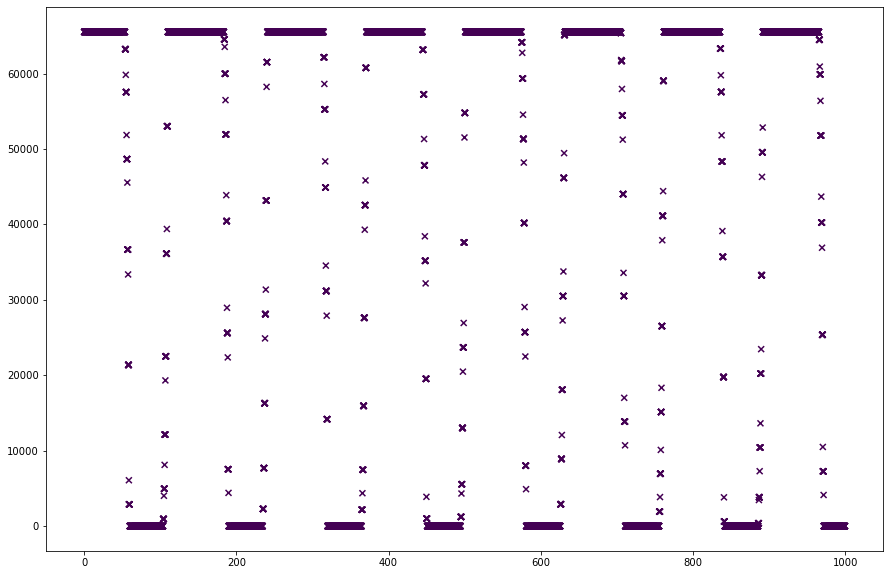

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
import pandas as pd

train_path = r"dataset\dataset\train"
test_path = r"dataset\dataset\test"
valid_path = r"dataset\dataset\valid"

train_list = glob.glob(train_path + "/*.csv")
test_list = glob.glob(test_path + "/*.csv")
valid_list = glob.glob(valid_path + "/*.csv")

train_df = pd.DataFrame(pd.read_csv(train_list[0]))
for i in range(1,len(train_list)):
    train_data = pd.read_csv(train_list[i])
    train_df = pd.DataFrame(train_data)
    
test_df = pd.DataFrame(pd.read_csv(test_list[0]))
for i in range(1,len(test_list)):
    test_data = pd.read_csv(test_list[i])
    test_df = pd.DataFrame(test_data)
    
valid_df = pd.DataFrame(pd.read_csv(valid_list[0]))
for i in range(1,len(valid_list)):
    valid_data = pd.read_csv(valid_list[i])
    valid_df = pd.DataFrame(valid_data)
    
X_train = train_df
Xval = valid_df
X_test = test_df

def estimateGaussian(X):
    m = X.shape[0]
    #compute mean of X
    sum_ = np.sum(X,axis=0)
    mu = (sum_/m)
    # compute variance of X
    var = np.var(X,axis=0)
    print(mu, var)
    return mu,var

def multivariateGaussian(X, mu, sigma):
    k = len(mu)
    sigma=np.diag(sigma)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma) * X,axis=1))
    return p

mu, sigma = estimateGaussian(X_train)
p = multivariateGaussian(X_test, mu, sigma)
plt.figure(figsize=(15,10))
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],marker="x", c=p, cmap='viridis');
outliers = np.nonzero(p<0.001)[0]
plt.scatter(X_test[outliers,0],X_test[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);